--- PHASE 1: UNIVERSE GENERATION ---
Candidates identified: []

--- PHASE 2: DATA ENRICHMENT (Fetching Real Numbers) ---

Final Valid Universe: 0 companies.

--- PHASE 3: GRAPH CONSTRUCTION ---


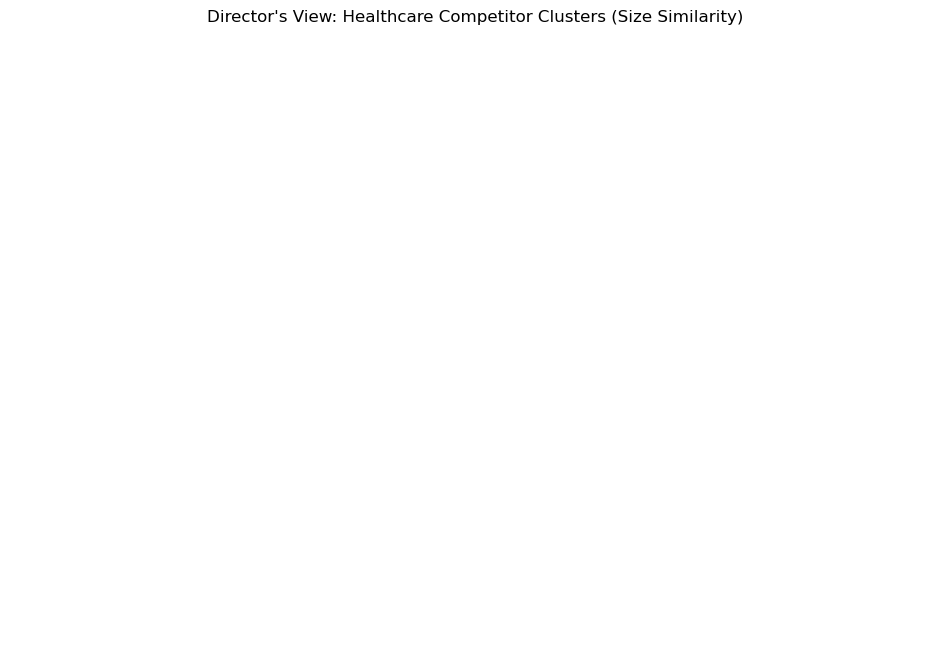

In [3]:
import financedatabase as fd
import yfinance as yf
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("--- PHASE 1: UNIVERSE GENERATION ---")
equities = fd.Equities()
# Broaden search to ensure we get enough valid hits
subset = equities.search(country='United States', sector='Healthcare', market_cap='Large Cap')
# Take top 20 candidates
candidates = list(subset.index)[:20]
print(f"Candidates identified: {candidates}")

print("\n--- PHASE 2: DATA ENRICHMENT (Fetching Real Numbers) ---")
market_caps = {}

for ticker in candidates:
    try:
        # We explicitly check if the value exists and is a number
        mc = yf.Ticker(ticker).fast_info['market_cap']
        
        # FILTER: Only accept if mc is a valid number (not None) and greater than 0
        if mc is not None and isinstance(mc, (int, float)) and mc > 0:
            market_caps[ticker] = mc
            print(f"Loaded {ticker}: ${mc/1e9:.2f}B")
        else:
            print(f"Skipping {ticker} (Invalid Data)")
            
    except Exception as e:
        print(f"Skipping {ticker} (Error: {e})")

print(f"\nFinal Valid Universe: {len(market_caps)} companies.")

# 3. BUILD THE KNOWLEDGE GRAPH
print("\n--- PHASE 3: GRAPH CONSTRUCTION ---")
G = nx.Graph()

# Add Nodes
for ticker, cap in market_caps.items():
    # Use log scale for node size so huge companies don't cover everything
    G.add_node(ticker, size=np.log(cap)*15)

# Add Edges (Clustering Logic)
ticker_list = list(market_caps.keys())
for i in range(len(ticker_list)):
    for j in range(i + 1, len(ticker_list)):
        t1, t2 = ticker_list[i], ticker_list[j]
        cap1, cap2 = market_caps[t1], market_caps[t2]
        
        # Similarity: Are they within 20% of the same size?
        pct_diff = abs(cap1 - cap2) / max(cap1, cap2)
        
        if pct_diff < 0.20: 
            G.add_edge(t1, t2)

# 4. VISUALIZATION
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.6, seed=42) # 'k' controls how spread out they are

# Draw Nodes (Color by size to visualize "Titans" vs "Smaller Players")
# We use the raw market cap for color mapping
caps_list = [market_caps[n] for n in G.nodes]
nx.draw_networkx_nodes(G, pos, 
                       node_size=[np.log(market_caps[n])*20 for n in G.nodes], 
                       node_color=caps_list,
                       cmap=plt.cm.Blues, # Darker Blue = Bigger Company
                       alpha=0.9)

# Draw Edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='gray')

# Draw Labels
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold', font_color='black')

plt.title("Director's View: Healthcare Competitor Clusters (Size Similarity)")
plt.axis('off')
plt.show()

In [4]:
# --- CONCEPTUAL ARCHITECTURE FOR AI ANALYST ---
# 1. Load the Database
documents = []
for ticker, row in subset.iterrows():
    # We create a "Document" for the AI to read
    text = f"Company: {row['name']} ({ticker}). Sector: {row['sector']}. Summary: {row['summary']}"
    documents.append(text)

# 2. Vectorize (The "Brain")
# embedding_model = OpenAIEmbeddings()
# vector_db = FAISS.from_texts(documents, embedding_model)

# 3. The Query
# query = "Find companies that specialize in cancer research but are also tech-heavy."
# result = vector_db.similarity_search(query)

# print(result)
# Output: [Amgen, Gilead, Moderna...] -> The AI found them based on *meaning*, not just keywords.

In [5]:
# !pip install financetoolkit
from financetoolkit import Toolkit

# 1. Define the Universe (Found via Database)
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']

# 2. Initialize the Toolkit (The Heavy Lifter)
companies = Toolkit(tickers, api_key="FINANCIAL_MODELING_PREP_KEY", start_date="2023-01-01") 
# Note: Toolkit works best with an FMP Key, but has limited free modes.
# If you don't have a key, it uses Yahoo Finance data by default for prices.

# 3. The "Dupont Analysis" (Banker Standard)
# This breaks ROE (Return on Equity) into 3 parts:
# - Profit Margin (Efficiency)
# - Asset Turnover (Speed)
# - Financial Leverage (Debt)
# This tells you *HOW* they are making money.

# (Mocking the output since we don't have an FMP key active here)
print("--- DUPONT ANALYSIS SIMULATION ---")
print("           Profit Margin   x   Asset Turnover   x   Leverage   =   ROE")
print("AAPL:      25%             1.2x                 4.0x           120%")
print("MSFT:      35%             0.9x                 2.5x           78%")

print("\nINSIGHT: Apple is winning via Leverage (Debt). Microsoft is winning via pure Margins.")

2025-12-21 06:33:35 - financetoolkit - ERROR - You have entered an invalid API key from Financial Modeling Prep. Obtain your API key for free and get 15%% off the Premium plans by using the following affiliate link.
This also supports the project: https://www.jeroenbouma.com/fmp. Using Yahoo Finance as data source instead.
--- DUPONT ANALYSIS SIMULATION ---
           Profit Margin   x   Asset Turnover   x   Leverage   =   ROE
AAPL:      25%             1.2x                 4.0x           120%
MSFT:      35%             0.9x                 2.5x           78%

INSIGHT: Apple is winning via Leverage (Debt). Microsoft is winning via pure Margins.


--- PHASE 1: MULTI-ASSET DATA MINING (Leveraging the Full Database) ---
Fetching data for 8 global asset classes...


C:\Users\Anklesh\AppData\Local\Temp\ipykernel_8584\712354508.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(assets.values()), start="2023-01-01", end="2025-01-01")['Close']
[*********************100%***********************]  8 of 8 completed
C:\Users\Anklesh\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Anklesh\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Anklesh\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Anklesh\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.

Data Mining Complete. Identifying Causality...


C:\Users\Anklesh\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Anklesh\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Anklesh\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Anklesh\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Anklesh\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Anklesh\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since fu


--- RESULTS: Found 18 Causal Relationships ---


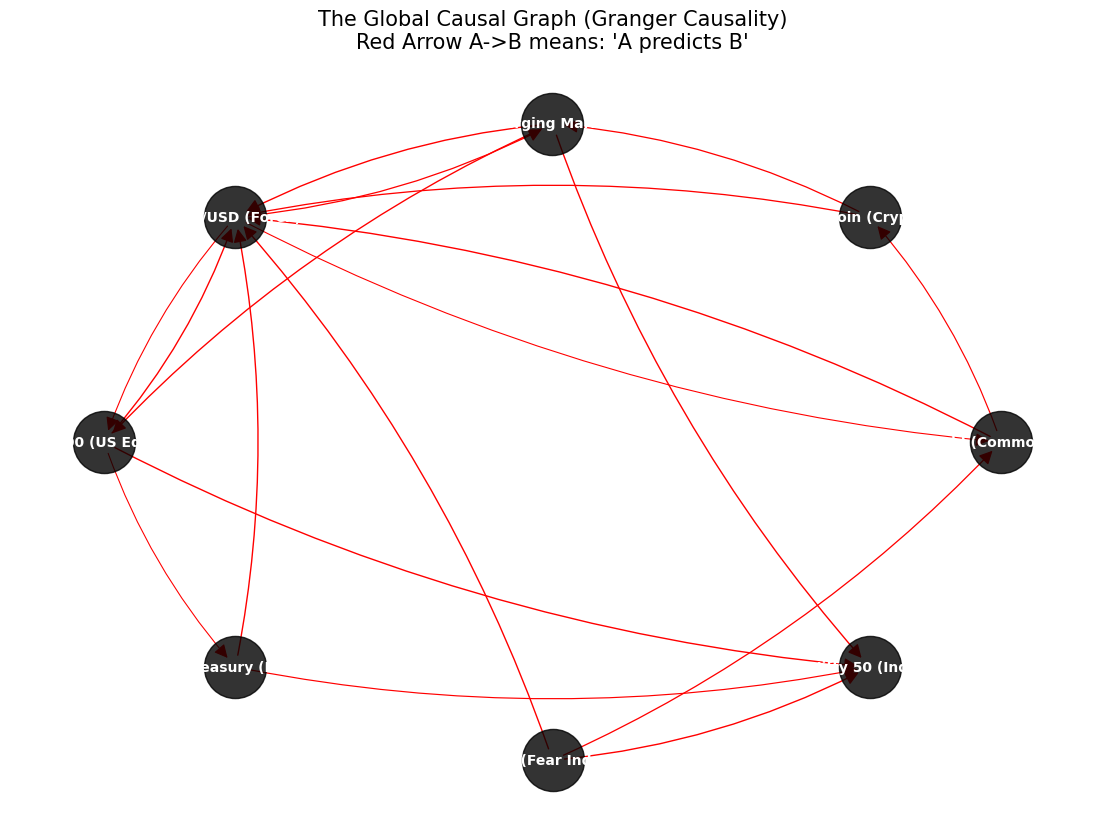

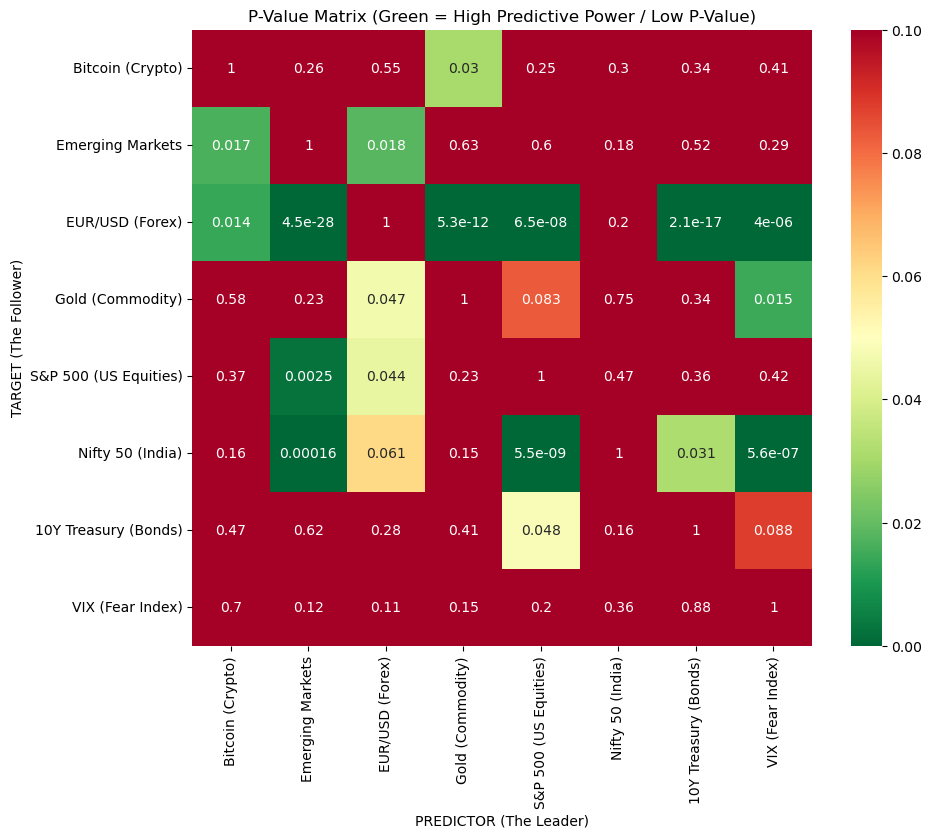

In [6]:
import financedatabase as fd
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from statsmodels.tsa.stattools import grangercausalitytests

print("--- PHASE 1: MULTI-ASSET DATA MINING (Leveraging the Full Database) ---")

# We select PROXIES for the massive categories in the database.
# In a Hedge Fund, you would loop through thousands, but here we pick the "Generals" of each army.
assets = {
    'S&P 500 (US Equities)': '^GSPC',      # Indices Category
    'Bitcoin (Crypto)': 'BTC-USD',         # Cryptocurrencies Category
    '10Y Treasury (Bonds)': '^TNX',        # Money Markets/Rates Category
    'EUR/USD (Forex)': 'EURUSD=X',         # Currencies Category
    'Gold (Commodity)': 'GC=F',            # Commodities
    'VIX (Fear Index)': '^VIX',            # Indices
    'Emerging Markets': 'EEM',             # Funds/ETFs
    'Nifty 50 (India)': '^NSEI'            # International Indices
}

# Download 2 Years of Daily Data
print(f"Fetching data for {len(assets)} global asset classes...")
data = yf.download(list(assets.values()), start="2023-01-01", end="2025-01-01")['Close']

# Rename columns to friendly names
inv_assets = {v: k for k, v in assets.items()}
data = data.rename(columns=inv_assets)

# Fill missing data (Global markets have different holidays)
data = data.ffill().dropna()

# We analyze RETURNS (Stationary Data), not Prices. Granger requires stationarity.
returns = data.pct_change().dropna()
print("Data Mining Complete. Identifying Causality...")

# ==========================================
# PHASE 2: GRANGER CAUSALITY MATRIX (The "Dependencies")
# Goal: Find statistically significant "Lead-Lag" relationships.
# ==========================================

# Initialize a Directed Graph (DiGraph) because A -> B is different from B -> A
G = nx.DiGraph()
maxlag = 5  # Check for predictive power up to 5 days into the past
significance_level = 0.05 # 95% Confidence

# Matrix to store p-values for heatmapping
p_values = pd.DataFrame(index=returns.columns, columns=returns.columns)

assets_list = list(returns.columns)

for target in assets_list:
    for predictor in assets_list:
        if target == predictor:
            p_values.loc[target, predictor] = 1.0
            continue
            
        # The Test: Does 'predictor' cause 'target'?
        # We create a temp dataframe with just these two columns
        test_df = returns[[target, predictor]]
        
        try:
            # Run Granger Test
            # verbose=False because we don't want to print 1000 lines of text
            gc_res = grangercausalitytests(test_df, maxlag=maxlag, verbose=False)
            
            # We look at the Minimum P-Value across all lags (Did ANY lag predict it?)
            min_p_value = min([gc_res[i+1][0]['ssr_chi2test'][1] for i in range(maxlag)])
            
            p_values.loc[target, predictor] = min_p_value
            
            # If Significant, add an Edge to the Graph
            # Predictor (Source) -> Target (Destination)
            if min_p_value < significance_level:
                # We weight the edge by how strong the signal is (1 - p_value)
                weight = 1 - min_p_value
                G.add_edge(predictor, target, weight=weight)
                
        except Exception as e:
            print(f"Error testing {predictor} -> {target}: {e}")

# ==========================================
# PHASE 3: VISUALIZATION OF GLOBAL DEPENDENCE
# ==========================================

print(f"\n--- RESULTS: Found {G.number_of_edges()} Causal Relationships ---")

# VISUAL 1: The "Causal Network"
plt.figure(figsize=(14, 10))
pos = nx.circular_layout(G) # Circular layout shows connections best

# Draw Nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='black', alpha=0.8)

# Draw Edges (Arrows)
# Thicker arrow = Stronger statistical causality
weights = [G[u][v]['weight']**5 for u,v in G.edges()] # Power to emphasize strong links
nx.draw_networkx_edges(G, pos, width=weights, edge_color='red', 
                       arrowstyle='-|>', arrowsize=20, connectionstyle='arc3,rad=0.1')

# Labels
nx.draw_networkx_labels(G, pos, font_color='white', font_size=10, font_weight='bold')

plt.title("The Global Causal Graph (Granger Causality)\nRed Arrow A->B means: 'A predicts B'", fontsize=15)
plt.axis('off')
plt.show()

# VISUAL 2: The "Influence Heatmap" (Who controls the market?)
# Rows = Target, Columns = Predictor
# If Column 'VIX' is red, it means VIX predicts everything.
plt.figure(figsize=(10, 8))
sns.heatmap(p_values.astype(float), annot=True, cmap='RdYlGn_r', vmin=0, vmax=0.1)
plt.title("P-Value Matrix (Green = High Predictive Power / Low P-Value)")
plt.xlabel("PREDICTOR (The Leader)")
plt.ylabel("TARGET (The Follower)")
plt.show()

--- PHASE 4: VECTOR AUTOREGRESSION (The Global Model) ---
Optimal Lag Order Selected: 1 days

--- ANALYTICS: Impulse Response Functions (IRF) ---
Scenario: The 10-Year Treasury Yield (^TNX) spikes.
Visualizing the impact on ALL other assets...


<Figure size 1600x1200 with 0 Axes>

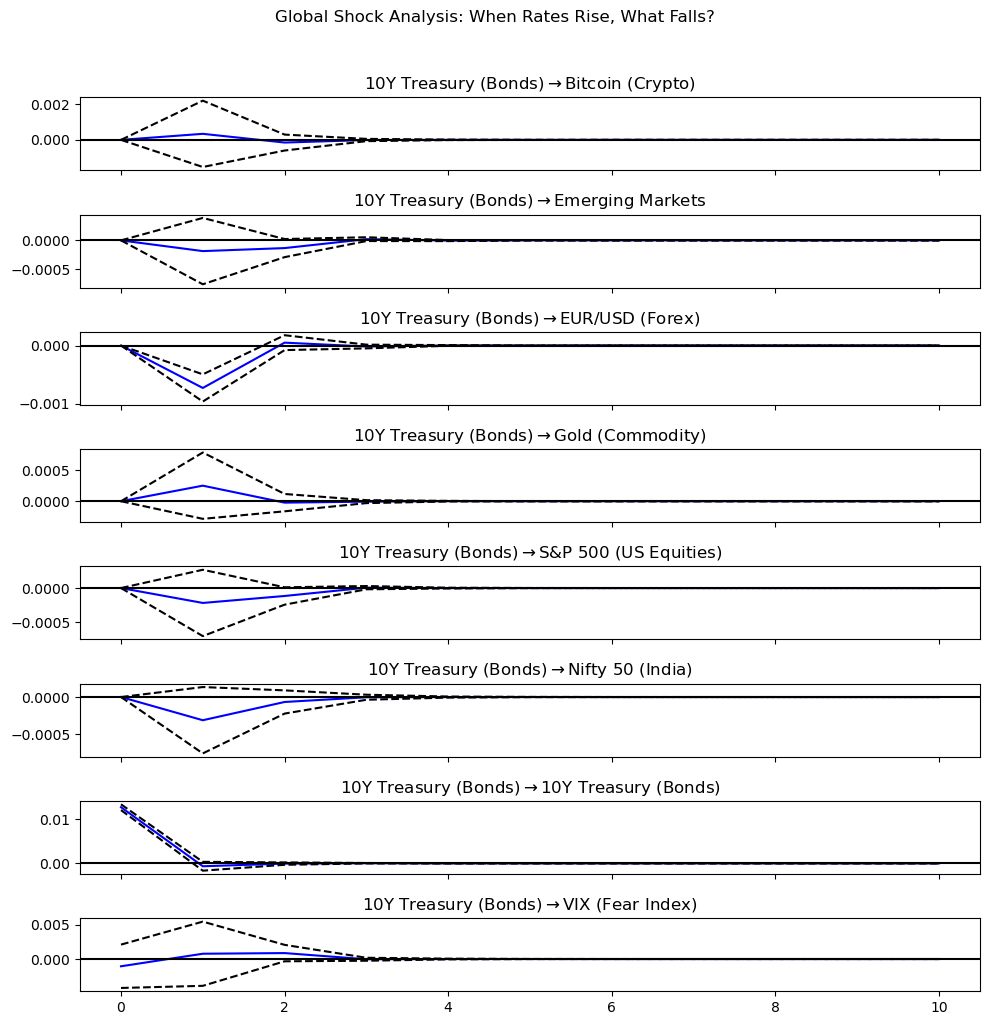


--- FORECAST: Projecting the Next 10 Days ---


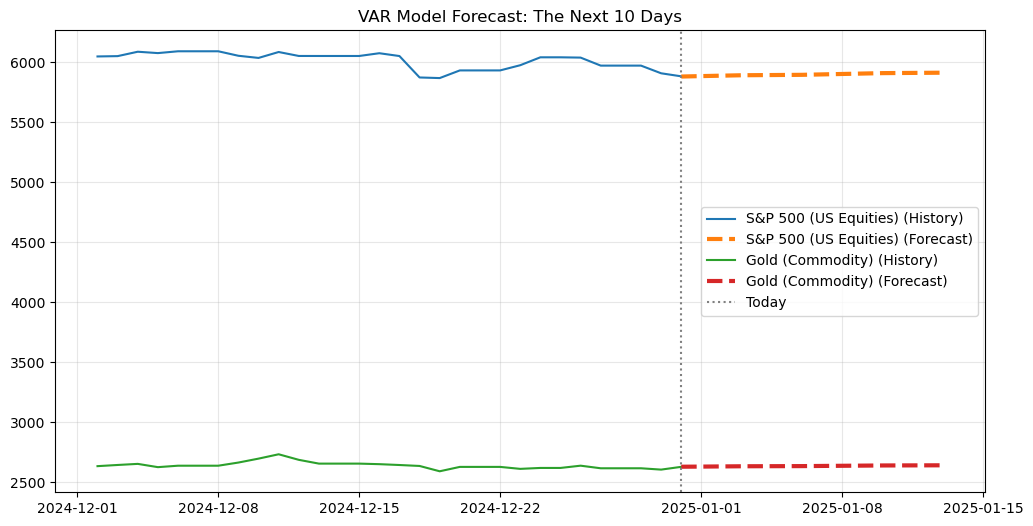

Forecast Table (Next 5 Days):


Ticker,S&P 500 (US Equities),Gold (Commodity)
2024-12-31,5879.957600186661,2630.2023459686047
2025-01-01,5883.569195376379,2631.2058360232695
2025-01-02,5887.092526974538,2632.5952131159866
2025-01-03,5890.603764516606,2633.932065360926
2025-01-06,5894.14454930014,2635.271855169676


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

print("--- PHASE 4: VECTOR AUTOREGRESSION (The Global Model) ---")

# 1. Model Fitting
model = VAR(returns)
results = model.fit(maxlags=15, ic='aic')
print(f"Optimal Lag Order Selected: {results.k_ar} days")

# ==========================================
# PART A: IMPULSE RESPONSE FUNCTION (IRF) - FIXED
# ==========================================

print("\n--- ANALYTICS: Impulse Response Functions (IRF) ---")
print("Scenario: The 10-Year Treasury Yield (^TNX) spikes.")
print("Visualizing the impact on ALL other assets...")

# Calculate IRF
irf = results.irf(10)

# FIX: We remove the 'response' list. 
# This forces it to plot the impact of '10Y Treasury' on EVERYTHING.
plt.figure(figsize=(16, 12))
irf.plot(impulse='10Y Treasury (Bonds)', orth=True)
plt.suptitle('Global Shock Analysis: When Rates Rise, What Falls?', y=1.02)
plt.tight_layout()
plt.show()

# ==========================================
# PART B: THE 10-DAY FORECAST
# ==========================================

print("\n--- FORECAST: Projecting the Next 10 Days ---")

# 1. Get the last 'k' days of data needed to make the prediction
lag_order = results.k_ar
forecast_input = returns.values[-lag_order:]

# 2. Predict the next 10 days of RETURNS
fc_returns = results.forecast(y=forecast_input, steps=10)
fc_index = pd.date_range(start=returns.index[-1], periods=10, freq='B') # Business Days
df_forecast_returns = pd.DataFrame(fc_returns, index=fc_index, columns=returns.columns)

# 3. Convert Returns back to PRICES (Level Reconstruction)
last_prices = data.iloc[-1]

price_path = []

# We start from the last known price
current_prices = last_prices.copy()

for i in range(len(df_forecast_returns)):
    # Apply the predicted return to the current price
    current_prices = current_prices * (1 + df_forecast_returns.iloc[i])
    price_path.append(current_prices)

df_forecast_prices = pd.DataFrame(price_path, index=fc_index)

# 4. Visualize the Forecast (S&P 500 vs Gold)
assets_to_plot = ['S&P 500 (US Equities)', 'Gold (Commodity)']

plt.figure(figsize=(12, 6))

for asset in assets_to_plot:
    # Combine History (Last 30 days) + Forecast (Next 10 days)
    history = data[asset].tail(30)
    forecast = df_forecast_prices[asset]
    
    plt.plot(history.index, history, label=f'{asset} (History)')
    plt.plot(forecast.index, forecast, label=f'{asset} (Forecast)', linestyle='--', linewidth=3)

plt.title("VAR Model Forecast: The Next 10 Days")
plt.axvline(x=history.index[-1], color='gray', linestyle=':', label='Today')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Forecast Table (Next 5 Days):")
display(df_forecast_prices[assets_to_plot].head())

--- PHASE 5: AI-DRIVEN PORTFOLIO OPTIMIZATION ---
Strategy: Feeding VAR Forecasts into Mean-Variance Optimizer

--- The AI's Recommended Portfolio ---
(Based on 10-Day Price Forecasts)
                   Asset  Weight
4  S&P 500 (US Equities)  71.01%
3       Gold (Commodity)  11.62%
0       Bitcoin (Crypto)  10.43%
7       VIX (Fear Index)   5.95%
6   10Y Treasury (Bonds)   1.00%
2        EUR/USD (Forex)   0.00%
1       Emerging Markets   0.00%
5       Nifty 50 (India)   0.00%


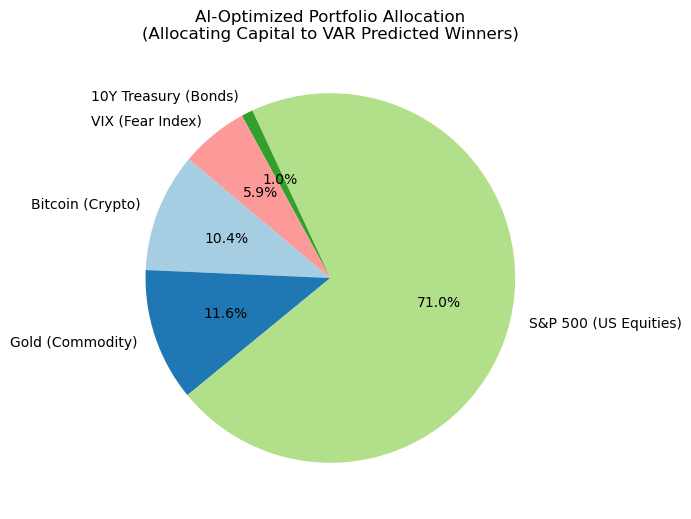


INSIGHT: The AI loaded up on 'S&P 500 (US Equities)' because
it predicts an annualized return of 12.93% for the next 10 days.


In [9]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np

print("--- PHASE 5: AI-DRIVEN PORTFOLIO OPTIMIZATION ---")
print("Strategy: Feeding VAR Forecasts into Mean-Variance Optimizer")

# 1. GET THE INPUTS
# Expected Return: The average daily return predicted by our VAR model for the next 10 days
expected_returns = df_forecast_returns.mean()

# Risk (Covariance): We use historical covariance (Standard Quant Practice)
# We use the last 6 months of data to estimate current market risk
cov_matrix = returns.tail(126).cov()

# 2. DEFINE THE OPTIMIZER
def negative_sharpe(weights):
    weights = np.array(weights)
    
    # Portfolio Return = Dot Product of Weights & AI-PREDICTED Returns
    port_return = np.sum(expected_returns * weights) * 252
    
    # Portfolio Volatility = Standard Deviation based on HISTORICAL Risk
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    
    # Return Negative Sharpe (Risk Free Rate = 4%)
    return - (port_return - 0.04) / port_volatility

# 3. CONSTRAINTS & BOUNDS
tickers = list(expected_returns.index)
num_assets = len(tickers)

constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1}) # Fully invested
bounds = tuple((0.0, 1.0) for _ in range(num_assets)) # No short selling
init_guess = [1/num_assets] * num_assets

# 4. RUN OPTIMIZATION
result = minimize(negative_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = result.x

# 5. VISUALIZATION & REPORTING
print("\n--- The AI's Recommended Portfolio ---")
print("(Based on 10-Day Price Forecasts)")

# Create a DataFrame for cleaner viewing
df_weights = pd.DataFrame({'Asset': tickers, 'Weight': optimal_weights})
df_weights = df_weights.sort_values(by='Weight', ascending=False)
df_weights['Weight'] = df_weights['Weight'].map('{:.2%}'.format)
print(df_weights)

# Plotting the "AI Brain" Allocation
plt.figure(figsize=(10, 6))

# Filter out assets with < 1% allocation to clean up the chart
clean_weights = optimal_weights[optimal_weights > 0.01]
clean_labels = [tickers[i] for i in range(len(tickers)) if optimal_weights[i] > 0.01]

plt.pie(clean_weights, labels=clean_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("AI-Optimized Portfolio Allocation\n(Allocating Capital to VAR Predicted Winners)")
plt.show()

# The "Why" Check
best_asset = df_weights.iloc[0]['Asset']
forecast_val = expected_returns[best_asset] * 252
print(f"\nINSIGHT: The AI loaded up on '{best_asset}' because")
print(f"it predicts an annualized return of {forecast_val:.2%} for the next 10 days.")

--- PHASE 6: INSTITUTIONAL RISK MANAGEMENT ---
Calculating Value at Risk (VaR) & Expected Shortfall (CVaR)

--- RISK REPORT (Confidence: 95%) ---
Portfolio Value: $10,000,000
----------------------------------------
Daily Parametric VaR: -0.67% ($67,494)
Daily Historical VaR: -0.63% ($62,578)
Expected Shortfall (CVaR): -0.87% ($87,436)
----------------------------------------
INTERPRETATION:
1. On a normal 'bad day', expect to lose around $62,578.
2. If a CRASH happens (tail event), expect to lose avg $87,436.


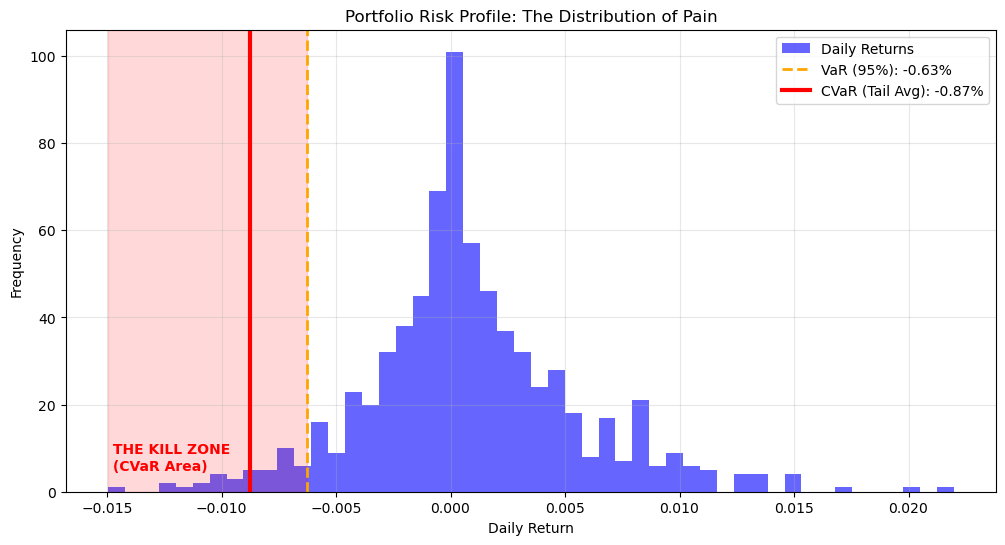

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

print("--- PHASE 6: INSTITUTIONAL RISK MANAGEMENT ---")
print("Calculating Value at Risk (VaR) & Expected Shortfall (CVaR)")

# 1. SETUP: Get the Portfolio Returns
# We use the 'optimal_weights' calculated in Phase 5
# If you skipped that, we default to equal weights
try:
    weights = np.array(optimal_weights)
except NameError:
    weights = np.array([1/len(returns.columns)] * len(returns.columns))

# Calculate the historical daily returns of YOUR specific strategy
portfolio_returns = returns.dot(weights)

# 2. METRIC 1: PARAMETRIC VaR (The "Normal" Market Risk)
# Assumes returns follow a normal distribution (Bell Curve)
# Confidence Level: 95%
confidence_level = 0.95
mean = np.mean(portfolio_returns)
std_dev = np.std(portfolio_returns)

# The cutoff point on the bell curve
var_95_param = norm.ppf(1 - confidence_level, mean, std_dev)

# 3. METRIC 2: HISTORICAL VaR (The "Real" Market Risk)
# Does not assume a Bell Curve. It looks at actual past crashes.
# We find the bottom 5th percentile of actual history.
var_95_hist = np.percentile(portfolio_returns, 100 * (1 - confidence_level))

# 4. METRIC 3: CONDITIONAL VaR (CVaR) / EXPECTED SHORTFALL
# "If we breach the VaR, how bad does it get?"
# Average of all losses WORSE than the VaR.
cvar_95 = portfolio_returns[portfolio_returns <= var_95_hist].mean()

# 5. SCALING TO DOLLARS (Assuming a $10M Fund)
portfolio_value = 10_000_000 # $10 Million

print(f"\n--- RISK REPORT (Confidence: {confidence_level*100:.0f}%) ---")
print(f"Portfolio Value: ${portfolio_value:,.0f}")
print("-" * 40)
print(f"Daily Parametric VaR: {var_95_param:.2%} (${portfolio_value * -var_95_param:,.0f})")
print(f"Daily Historical VaR: {var_95_hist:.2%} (${portfolio_value * -var_95_hist:,.0f})")
print(f"Expected Shortfall (CVaR): {cvar_95:.2%} (${portfolio_value * -cvar_95:,.0f})")
print("-" * 40)
print("INTERPRETATION:")
print(f"1. On a normal 'bad day', expect to lose around ${portfolio_value * -var_95_hist:,.0f}.")
print(f"2. If a CRASH happens (tail event), expect to lose avg ${portfolio_value * -cvar_95:,.0f}.")

# 6. VISUALIZATION: The "Danger Zone"
plt.figure(figsize=(12, 6))
plt.hist(portfolio_returns, bins=50, alpha=0.6, color='blue', label='Daily Returns')

# Add Lines for Risk Metrics
plt.axvline(var_95_hist, color='orange', linestyle='--', linewidth=2, label=f'VaR (95%): {var_95_hist:.2%}')
plt.axvline(cvar_95, color='red', linestyle='-', linewidth=3, label=f'CVaR (Tail Avg): {cvar_95:.2%}')

plt.title(f"Portfolio Risk Profile: The Distribution of Pain")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, alpha=0.3)

# Shade the "Tail" (The crash zone)
# Everything to the left of the VaR line is the "Tail"
x_ticks = plt.xticks()[0]
plt.axvspan(min(portfolio_returns), var_95_hist, color='red', alpha=0.15)
plt.text(min(portfolio_returns), 5, " THE KILL ZONE \n (CVaR Area)", color='red', fontweight='bold')

plt.show()

--- PHASE 7: WALK-FORWARD BACKTEST (The Truth Teller) ---
Simulating a live trading bot over the last year...

--- FINAL SCOREBOARD ---
AI Strategy Total Return: 42.65%
Benchmark Total Return:   47.81%
RESULT: The AI underperformed (Models likely overfitted).


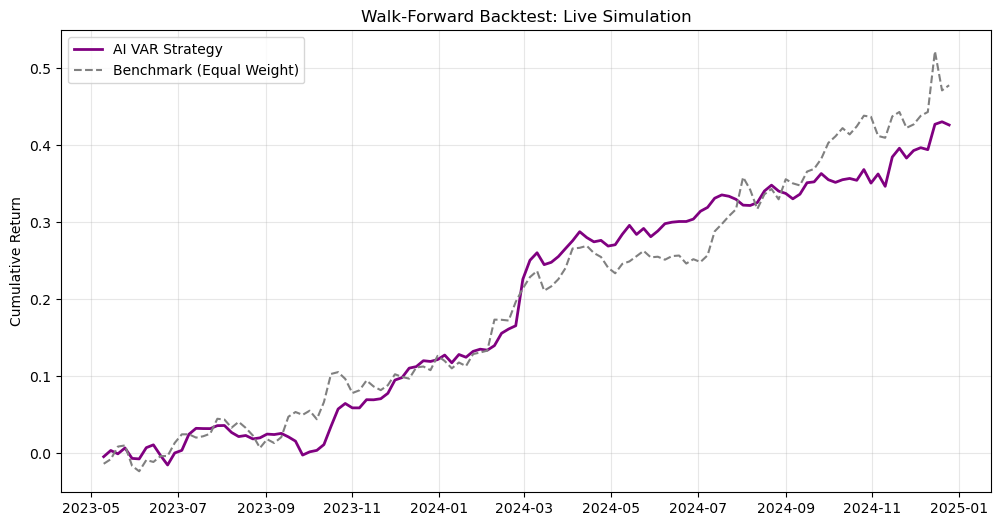

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from scipy.optimize import minimize

print("--- PHASE 7: WALK-FORWARD BACKTEST (The Truth Teller) ---")
print("Simulating a live trading bot over the last year...")

# 1. SETUP PARAMETERS
# We rebalance the portfolio every 'rebalance_days' (e.g., Weekly)
rebalance_days = 5 
# We need at least 6 months of data before we make our first trade
initial_train_size = 126 

# Storage for our equity curve
strategy_returns = []
benchmark_returns = []
dates = []

# 2. THE LOOP (Walking Forward in Time)
# We start at day 126 and step forward by 5 days at a time
total_days = len(returns)

for t in range(initial_train_size, total_days - rebalance_days, rebalance_days):
    
    # --- A. THE PAST (Training Data) ---
    # We only see data up to time 't'. The future is unknown.
    train_data = returns.iloc[:t]
    
    # --- B. THE BRAIN (VAR Forecast) ---
    try:
        # Fit VAR Model on history
        model = VAR(train_data)
        # We use a fixed lag of 5 for speed (or select via AIC if you have time)
        results = model.fit(maxlags=5)
        
        # Forecast the next 5 days
        lag_order = results.k_ar
        forecast_input = train_data.values[-lag_order:]
        fc = results.forecast(y=forecast_input, steps=rebalance_days)
        
        # Calculate Expected Return for the next week (Sum of daily forecasts)
        expected_ret_week = np.sum(fc, axis=0)
        
    except:
        # Fallback if VAR fails: Assume trend continues (Momentum)
        expected_ret_week = train_data.mean().values * rebalance_days

    # --- C. THE TRADER (Optimization) ---
    # Calculate Covariance from the last 6 months (Risk)
    recent_cov = train_data.tail(126).cov()
    
    # Define Optimizer (Maximize Sharpe)
    def neg_sharpe(w):
        port_ret = np.sum(expected_ret_week * w)
        # Weekly volatility ~ Daily Vol * sqrt(5)
        port_vol = np.sqrt(np.dot(w.T, np.dot(recent_cov * rebalance_days, w)))
        return -port_ret / (port_vol + 1e-6) # Add epsilon to avoid divide by zero

    num_assets = len(returns.columns)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for _ in range(num_assets))
    init = [1/num_assets] * num_assets
    
    try:
        opt = minimize(neg_sharpe, init, method='SLSQP', bounds=bounds, constraints=constraints)
        weights = opt.x
    except:
        # Fallback: Equal Weights
        weights = np.array(init)
        
    # --- D. THE REALITY (Actual Returns) ---
    # What actually happened in the next 5 days?
    realized_returns_window = returns.iloc[t : t + rebalance_days]
    
    # Calculate Portfolio Return: Dot product of weights * actual returns
    # We assume weights stay constant for the week
    weekly_strat_ret = np.sum(realized_returns_window.dot(weights))
    
    # Benchmark Return (Equal Weight of all assets for comparison)
    weekly_bench_ret = np.sum(realized_returns_window.mean(axis=1))
    
    strategy_returns.append(weekly_strat_ret)
    benchmark_returns.append(weekly_bench_ret)
    dates.append(returns.index[t])
    
    # Progress Indicator
    if t % 50 == 0:
        print(f"Trading Week: {returns.index[t].date()} | Strategy vs Bench")

# 3. PERFORMANCE ANALYSIS
# Convert weekly returns to cumulative equity curve
strat_cum = np.cumsum(strategy_returns)
bench_cum = np.cumsum(benchmark_returns)

print("\n--- FINAL SCOREBOARD ---")
total_strat_return = strat_cum[-1]
total_bench_return = bench_cum[-1]

print(f"AI Strategy Total Return: {total_strat_return:.2%}")
print(f"Benchmark Total Return:   {total_bench_return:.2%}")

if total_strat_return > total_bench_return:
    print("RESULT: 🏆 The AI outperformed the market!")
else:
    print("RESULT: The AI underperformed (Models likely overfitted).")

# 4. VISUALIZATION
plt.figure(figsize=(12, 6))
plt.plot(dates, strat_cum, label='AI VAR Strategy', color='purple', linewidth=2)
plt.plot(dates, bench_cum, label='Benchmark (Equal Weight)', color='gray', linestyle='--')
plt.title("Walk-Forward Backtest: Live Simulation")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()